In [2]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


2024-08-18 12:23:50.901 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-08-18 12:23:54.255 Session state does not function when running a script without `streamlit run`


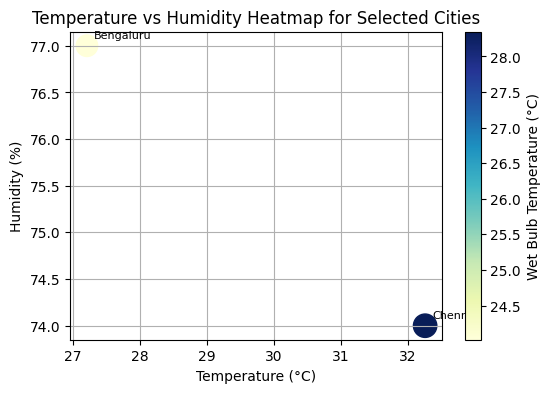

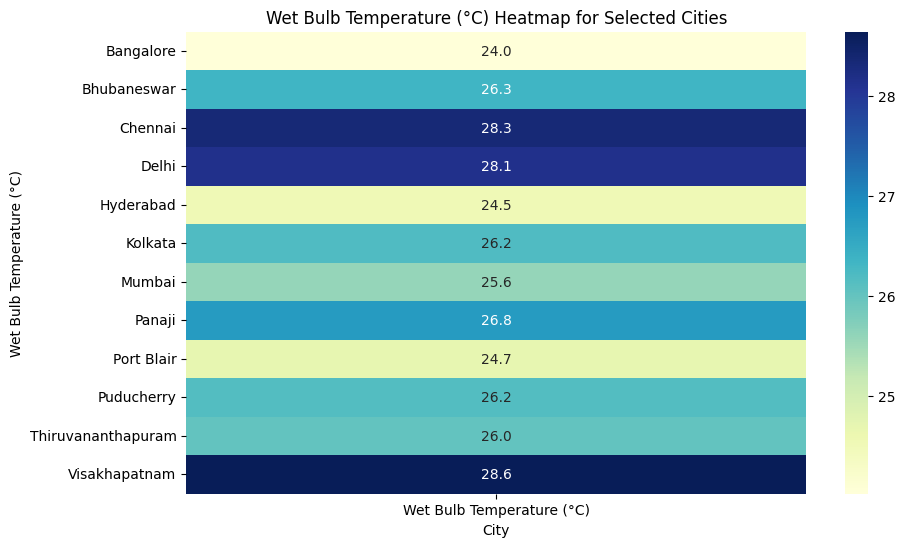

In [3]:

import math
import streamlit as st
import numpy as np
import datetime
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to retrieve weather data using OpenWeatherMap API
def get_weather_data(city):
    api_key = '251597c2f184b437e4411235bdd71fec'
    base_url = 'http://api.openweathermap.org/data/2.5/weather'
    params = {'q': city, 'appid': api_key, 'units': 'metric'}
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        temperature = data['main']['temp']
        humidity = data['main']['humidity']
        return temperature, humidity
    else:
        st.error(f'Error: Unable to fetch weather data for {city}')
        return None, None

# Function to calculate wet bulb temperature using the new formula
def calculate_wet_bulb_temperature(T, RH):
    # Convert RH to a ratio
    RH_ratio = RH
    # Apply the new formula
    tw = T * math.atan(0.151977 * np.sqrt(RH_ratio + 8.313659)) + \
         0.00391838 * np.sqrt(RH_ratio*RH_ratio*RH_ratio) * math.atan(0.023101 * RH_ratio) - \
         math.atan(RH_ratio - 1.676331) + \
         math.atan(T + RH_ratio) - 4.686035

    return tw

st.set_page_config(layout="wide", page_title="Omni Calculator")
st.title("🖩 Wet Bulb Calculator")

current_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

city_options = [
    "Hyderabad", "Bengaluru", "Mumbai", "Jaipur", "Chandigarh", "Chennai", "Kolkata",
    "Lucknow", "Ahmedabad", "Surat", "Visakhapatnam", "Nagpur", "Amritsar", "Nashik",
    "Bhopal", "Agra", "Patna", "Kanpur", "Pune", "Jamshedpur", "Bhubaneswar", "Warangal",
    "Kochi", "Meerut", "Vijayawada", "Indore", "Vadodara", "Varanasi", "Faridabad",
    "Ghaziabad", "Coimbatore", "Mangaluru", "Dehradun", "Mysuru", "Ludhiana", "Rajkot",
    "Kalaburagi", "Belagavi", "Anantapur", "Madurai", "Raipur", "Salem", "Bikaner", "Jhansi",
    "Cuttack", "Ajmer", "Udaipur", "Prayagraj", "Aurangabad", "New Delhi", "Navi Mumbai"
]

additional_cities = [
    "Yamunanagar", "Warangal", "Vijayanagaram", "Vellore", "Unnao", "Uluberia", "Ulhasnagar", "Ujjain", "Udaipur",
    "Tumkur", "Tiruvottiyur", "Tiruppur", "Tirupati", "Tirunelveli", "Tiruchirappalli", "Thrissur", "Thoothukudi",
    "Thiruvananthapuram", "Thanjavur", "Tenali", "Tadipatri", "Tadepalligudem", "Suryapet", "Surendranagar Dudhrej",
    "Sultan Pur Majra", "Srikakulam", "Sri Ganganagar", "South Dumdum", "Sonipat", "Solapur", "Siwan", "Sirsa",
    "Singrauli", "Siliguri", "Sikar", "Shivpuri", "Shivamogga", "Shimla", "Shahjahanpur", "Serampore", "Secunderabad",
    "Satna", "Satara", "Sasaram", "Sangli-Miraj & Kupwad", "Sambhal", "Sambalpur", "Sambalpur", "Salem", "Saharsa",
    "Saharanpur", "Sagar", "Rourkela", "Rourkela", "Rohtak", "Rewa", "Raurkela Industrial Township", "Ratlam", "Rampur",
    "Ramagundam", "Rajpur Sonarpur", "Rajahmundry", "Raiganj", "Raichur", "Rae Bareli", "Purnia", "Puducherry",
    "Proddatur", "Patiala", "Parbhani", "Panvel", "Panipat", "Panihati", "Panchkula", "Pallavaram", "Pali", "Ozhukarai",
    "Orai", "Ongole", "North Dumdum", "Noida", "Nizamabad", "New Delhi", "Nellore", "Navi Mumbai Panvel Raigad",
    "Narasaraopet", "Nangloi Jat", "Nandyal", "Nanded", "Naihati", "Nagarcoil", "Nadiad", "Mysore", "Muzaffarpur",
    "Muzaffarnagar", "Murwara", "Munger", "Motihari", "Morvi", "Morena", "Moradabad", "Mirzapur", "Miryalaguda",
    "Mira-Bhayandar", "Mau", "Mathura", "Mango", "Mangalore", "Malegaon", "Malda", "Maheshtala", "Mahesana", "Madhyamgram",
    "Madanapalle", "Machilipatnam", "Loni", "Latur", "Kurnool", "Kulti", "Kozhikode", "Kottayam", "Korba", "Kollam",
    "Kolhapur", "Kochi", "Kishanganj", "Kirari Suleman Nagar", "Khora", "Kharagpur", "Khandwa", "Khammam", "Kavali",
    "Katihar", "Karnal", "Karimnagar", "Karawal Nagar", "Karaikudi", "Kamarhati", "Kakinada", "Kadapa", "Junagadh",
    "Jhansi", "Jehanabad", "Jaunpur", "Jamshedpur", "Jamnagar", "Jammu", "Jamalpur", "Jalna", "Jalgaon", "Jalandhar",
    "Imphal", "Ichalkaranji", "Hugli and Chinsurah", "Hubballi-Dharwad", "Hospet", "Hindupur", "Haridwar", "Hapur",
    "Haldia", "Hajipur", "Guwahati", "Gurgaon", "Guntur", "Guntakal", "Guna", "Gulbarga", "Gudivada", "Gorakhpur",
    "Gopalpur", "Gaya", "Gandhinagar", "Gandhidham", "Firozabad", "Fatehpur", "Farrukhabad", "Etawah", "Erode",
    "Eluru", "Durgapur", "Durg", "Dindigul", "Dhule", "Dharmavaram", "Dewas", "Deoghar", "Dehri", "Dehradun", "Davanagere",
    "Darbhanga", "Danapur", "Cuttack", "Chittoor", "Chapra", "Chandrapur", "Chandigarh", "Buxar", "Burhanpur", "Bulandshahr",
    "Bokaro", "Bilaspur", "Bikaner", "Bijapur", "Bihar Sharif", "Bidhan Nagar", "Bidar", "Bhusawal", "Bhubaneswar", "Bhiwani",
    "Bhiwandi", "Bhind", "Bhimavaram", "Bhilwara", "Bhilai", "Bhavnagar", "Bhatpara", "Bharatpur", "Bhalswa Jahangir Pur",
    "Bhagalpur", "Bettiah", "Berhampur", "Bellary", "Belgaum", "Begusarai", "Bathinda", "Bareily", "Bardhaman", "Barasat",
    "Baranagar", "Bally", "Bahraich", "Baharampur", "Bagaha", "Avadi", "Aurangabad", "Asansol", "Arrah", "Anantapur", "Anand",
    "Amroha", "Amravati", "Ambernath", "Ambattur", "Ambala", "Amaravati"
]

city_options.extend(additional_cities)


selected_cities = st.multiselect("Select cities", city_options, default=["Chennai", "Bengaluru"])

temperature, humidity = get_weather_data(selected_cities)

if st.button("Calculate Wet bulb Temperature"):
    st.header("Results")
    # Calculate Wet Bulb Temperature
    tw = calculate_wet_bulb_temperature(temperature, humidity)
    # Display results
    st.write(f'⌚️Time:{current_time}')
    st.info(f'🌇City: {selected_cities}')
    st.info(f'🌡Temperature: {temperature}°C')
    st.info(f'💧Humidity: {humidity}%')
    st.info(f'🌡Wet Bulb Temperature: {tw:.2f}°C')

# Function to plot temperature vs humidity as a heatmap with city names above dots
def plot_temp_vs_humidity(city_names):
    # Fetch temperature and humidity data for each city
    temperatures = []
    humidities = []
    city_labels = []  # To store city names for annotation
    for city_name in city_names:
        temperature, humidity = get_weather_data(city_name)
        if temperature is not None and humidity is not None:
            temperatures.append(temperature)
            humidities.append(humidity)
            city_labels.append(city_name)

    # Calculate wet bulb temperature for each city
    wet_bulb_temperatures = [calculate_wet_bulb_temperature(T, RH) for T, RH in zip(temperatures, humidities)]

    # Create a DataFrame
    df = pd.DataFrame({'Temperature (°C)': temperatures, 'Humidity (%)': humidities, 'Wet Bulb Temperature (°C)': wet_bulb_temperatures})

    # Plot temperature vs humidity as a heatmap with city names above dots
    fig, ax = plt.subplots(figsize=(6,4))
    im = ax.scatter(df['Temperature (°C)'], df['Humidity (%)'], s=df['Wet Bulb Temperature (°C)'] * 10, c=df['Wet Bulb Temperature (°C)'], cmap='YlGnBu')
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Humidity (%)')
    ax.set_title('Temperature vs Humidity Heatmap for Selected Cities')
    ax.grid(True)
    fig.colorbar(im, label='Wet Bulb Temperature (°C)')

    # Annotate city names above the dots
    for i, txt in enumerate(city_labels):
        ax.annotate(txt, (df['Temperature (°C)'][i], df['Humidity (%)'][i]), xytext=(5, 5), textcoords='offset points', fontsize=8)

    return fig

# Display the heatmap
st.subheader("Temperature vs Humidity Heatmap with City Names")
temp_vs_humidity_heatmap = plot_temp_vs_humidity(selected_cities)
st.pyplot(temp_vs_humidity_heatmap)

# Function to update the live dashboard with weather data
def update_dashboard():
    # Fetch weather data for selected cities
    weather_data = []
    for city in selected_cities:
        temperature, humidity = get_weather_data(city)
        if temperature is not None and humidity is not None:
            weather_data.append({'City': city, 'Temperature (°C)': temperature, 'Humidity (%)': humidity})

    # Check if weather data is available for any city
    if len(weather_data) > 0:
        # Create DataFrame from weather data
        df = pd.DataFrame(weather_data)
        # Calculate wet bulb temperature
        df['Wet Bulb Temperature (°C)'] = df.apply(lambda row: calculate_wet_bulb_temperature(row['Temperature (°C)'], row['Humidity (%)']), axis=1)

        # Display DataFrame
        st.write(df)

         # Sort DataFrame by wet bulb temperature
        df_sorted = df.sort_values(by='Wet Bulb Temperature (°C)',ascending=False)
    # Plot temperature vs humidity as a heatmap
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.heatmap(df_sorted.pivot_table(index='City', values='Wet Bulb Temperature (°C)'), annot=True, fmt=".1f", cmap="YlGnBu", ax=ax)
        ax.set_title('Wet Bulb Temperature (°C) Heatmap for Selected Cities')
        ax.set_xlabel('City')
        ax.set_ylabel('Wet Bulb Temperature (°C)')

        # Display the plot
        st.pyplot(fig)

        # Display DataFrame
        st.write(df)
    else:
        st.error("Error: Unable to fetch weather data for any city.")

# Set page configuration and title

st.info("🌦️ Live Weather Dashboard")

# List of selected cities (capitals and coastal cities in India)
selected_cities = [
    "Delhi", "Mumbai", "Kolkata", "Chennai", "Bangalore", "Hyderabad",
    "Panaji", "Thiruvananthapuram", "Bhubaneswar", "Puducherry", "Visakhapatnam", "Port Blair"
]

# Periodically update the dashboard every 5 minutes
update_dashboard()



# Initialize variables to store input values
temperature = 0
humidity = 0
st.header("Slider")

# Slider for temperature
st.subheader("Adjust Temperature:")
temperature = st.slider("Temperature (°C)", 0, 100, key="temperature_input")

    # Slider for humidity
st.subheader("Adjust Humidity:")
humidity = st.slider("Humidity (%)", 0, 100, key="humidity_input")

if st.button("Calculate Wet Bulb Temperature"):
    st.header("Results")
    # Calculate Wet Bulb Temperature
    tw = calculate_wet_bulb_temperature(temperature, humidity)
    # Display results
    st.info(f'🌡 Temperature: {temperature}°C')
    st.info(f'💧 Humidity: {humidity}%')
    st.info(f'🌡 Wet Bulb Temperature: {tw:.2f}°C')

